# Whether a user will make online purchase or not?

## 1. Exploratory Data Analysis

### Understand Data

In [1]:
# set working directory
import os
os.chdir("E:/NYU/2020SPRING/supervised&unsupervisedML/hw/Proj2")
print(os.getcwd())

# read in data
import pandas as pd
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

import warnings
warnings.filterwarnings("ignore")

E:\NYU\2020SPRING\supervised&unsupervisedML\hw\Proj2


In [2]:
# check the numbers of rows and columns
data.shape

(12330, 18)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
# descriptive summary
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# check missing values
data[data.isnull().any(axis=1)].count()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing value in each variable.

### Univariate Analysis

In [6]:
# numerical list
numerical = data.iloc[:,:10].columns

# categorical list
categorical = data.iloc[:,10:17].columns

Here we can see the distribution of catogorical variables.

Text(0, 0.5, 'Count')

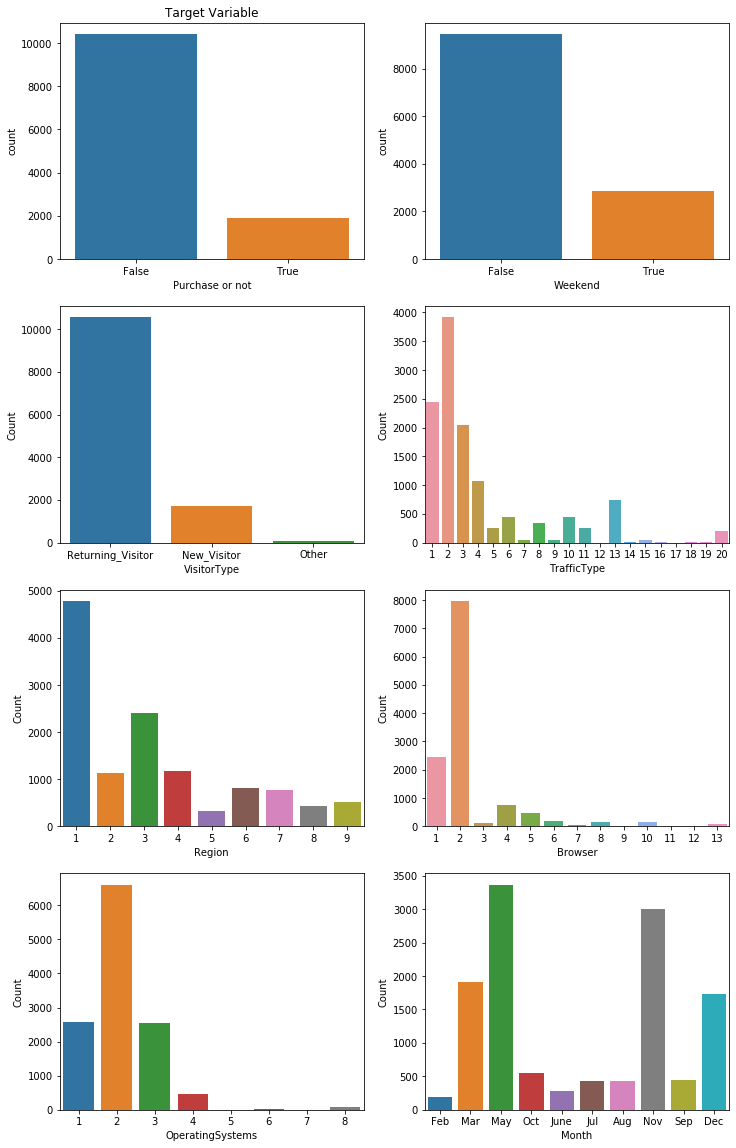

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import seaborn as sns

# categorical variable
plt.figure(figsize=(12,20))

# target variable
plt.subplot(4,2,1)
sns.countplot(data['Revenue'])
plt.title('Target Variable')
plt.xlabel('Purchase or not')
plt.ylabel('count')

# weekend
plt.subplot(4,2,2)
sns.countplot(data['Weekend'])
plt.ylabel('count')

# visitor type
plt.subplot(4,2,3)
sns.countplot(data['VisitorType'])
plt.ylabel('Count')

# traffic type
plt.subplot(4,2,4)
sns.countplot(data['TrafficType'])
plt.ylabel('Count')

# region
plt.subplot(4,2,5)
sns.countplot(data['Region'])
plt.ylabel('Count')

# broswer
plt.subplot(4,2,6)
sns.countplot(data['Browser'])
plt.ylabel('Count')

# operating systems
plt.subplot(4,2,7)
sns.countplot(data['OperatingSystems'])
plt.ylabel('Count')

# month
plt.subplot(4,2,8)
sns.countplot(data['Month'])
plt.ylabel('Count')

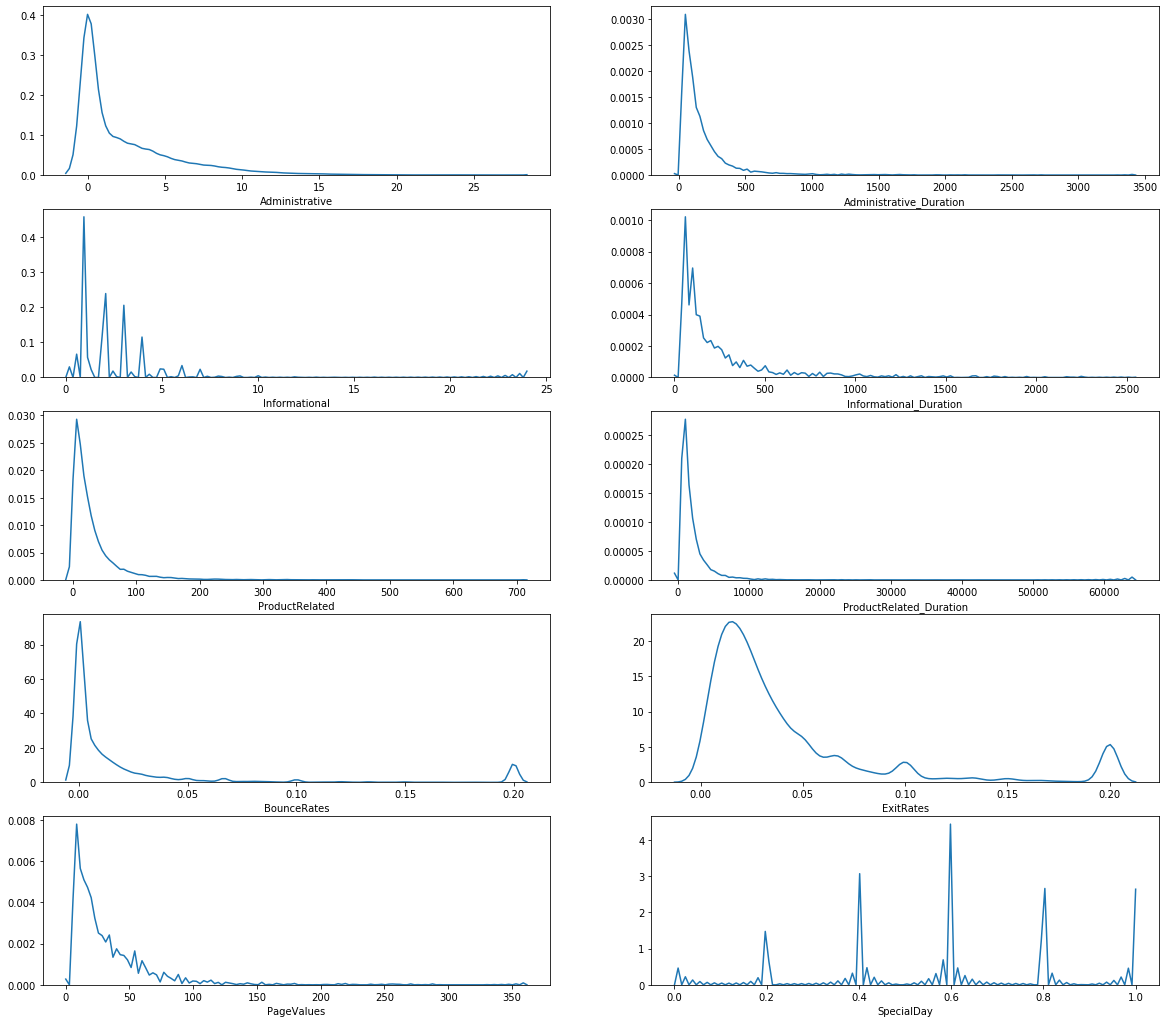

In [9]:
# continuous variables distribution
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.distplot(data[var],hist=False)

### Multivariates Analysis

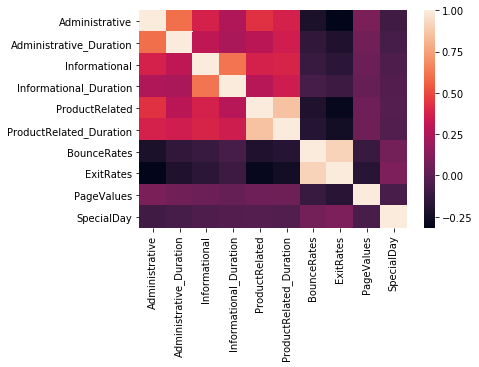

In [10]:
# correlation between numerical variables
sns.heatmap(data.iloc[:,:10].corr())

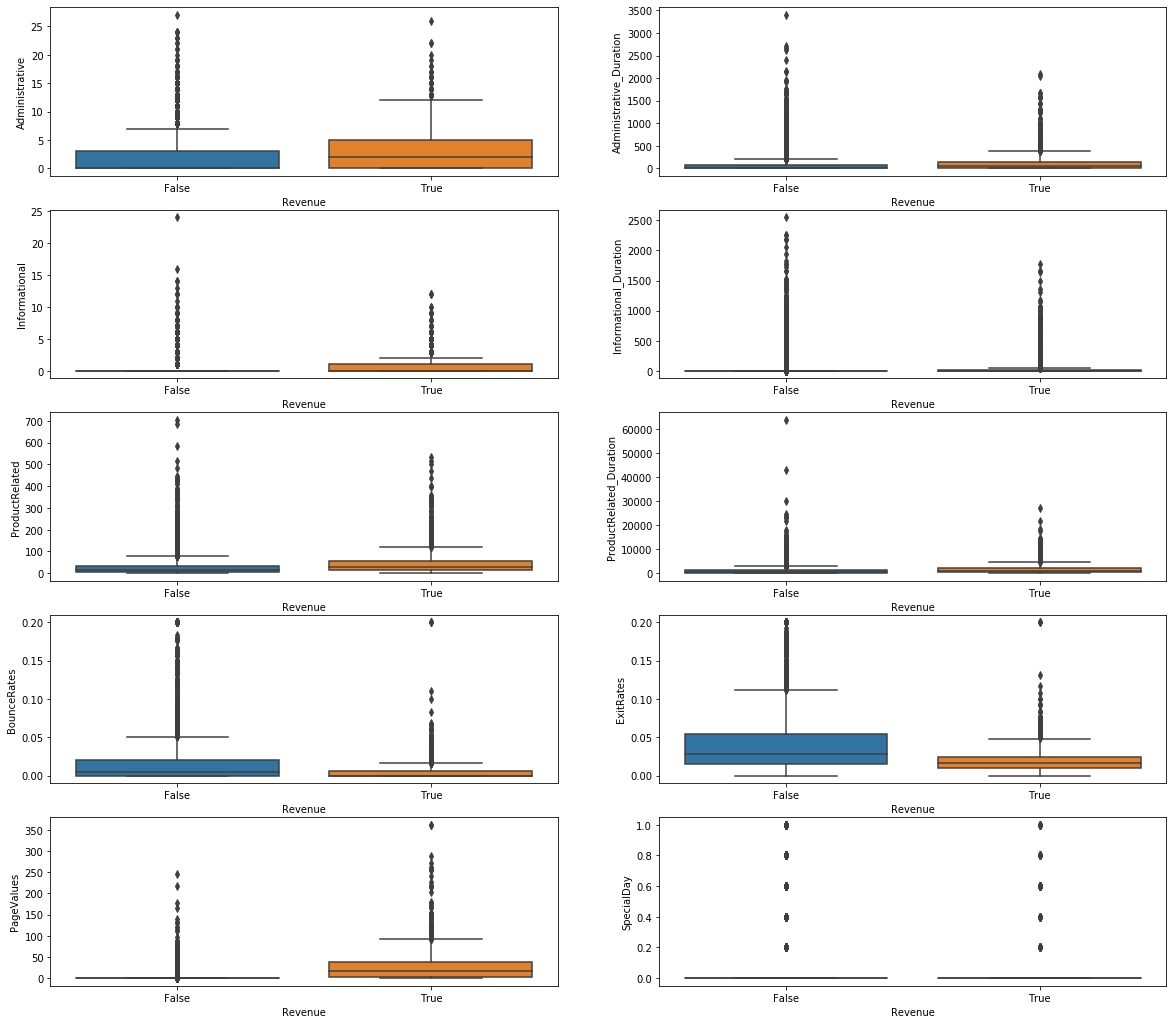

In [11]:
# revenue vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='Revenue',y=var,data=data)
                

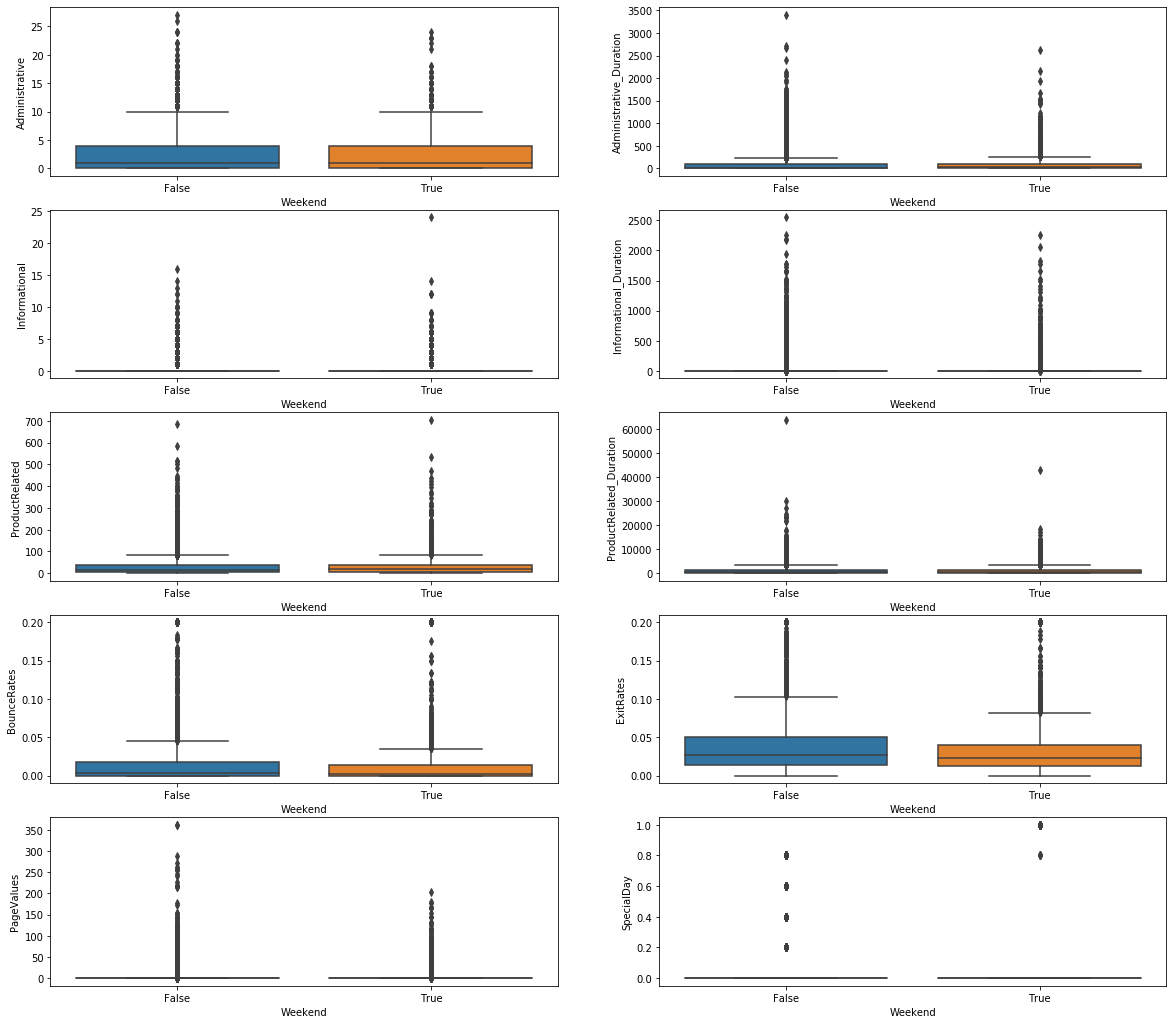

In [12]:
# weekend vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='Weekend',y=var,data=data)

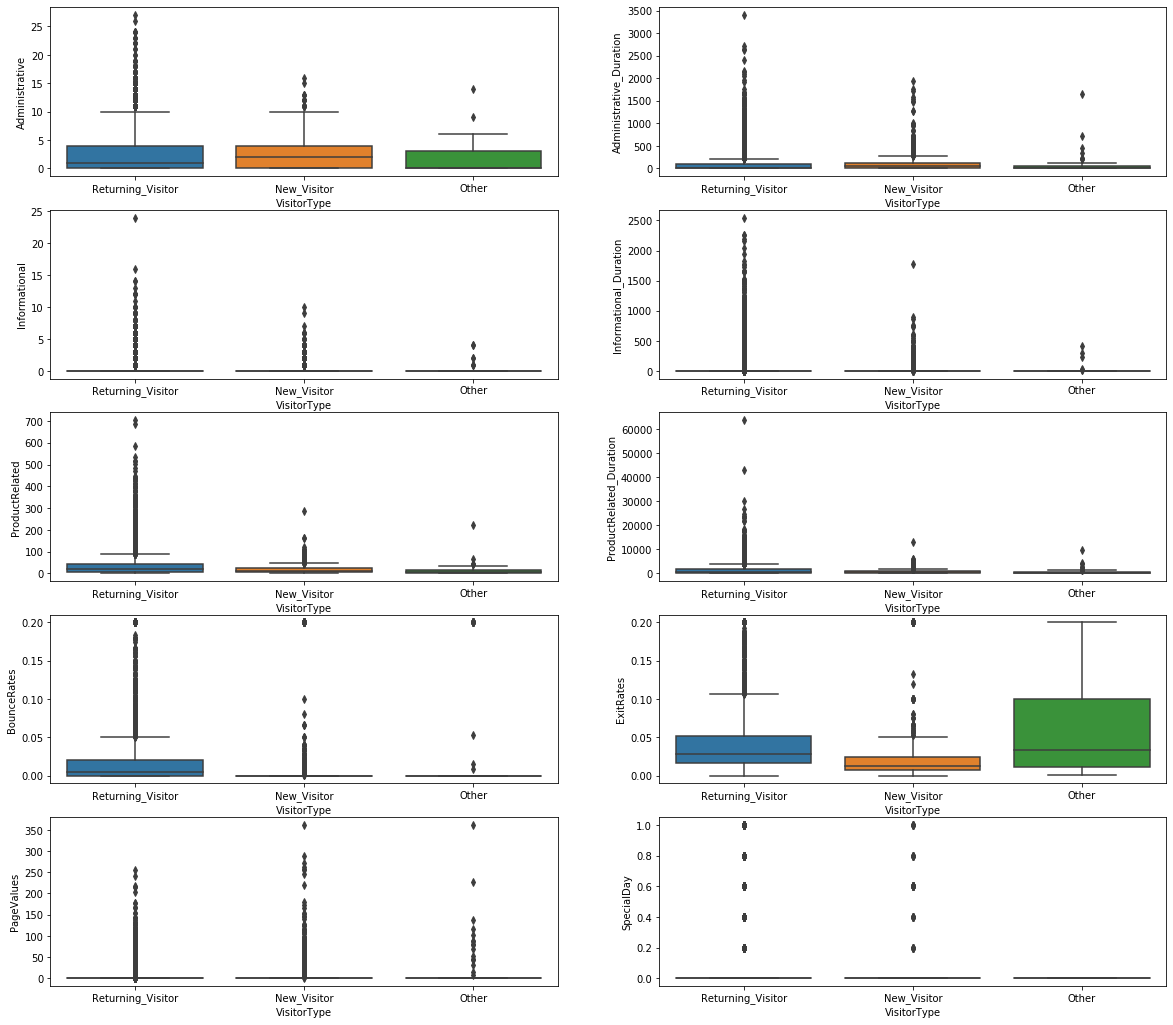

In [13]:
# visitor type vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='VisitorType',y=var,data=data)

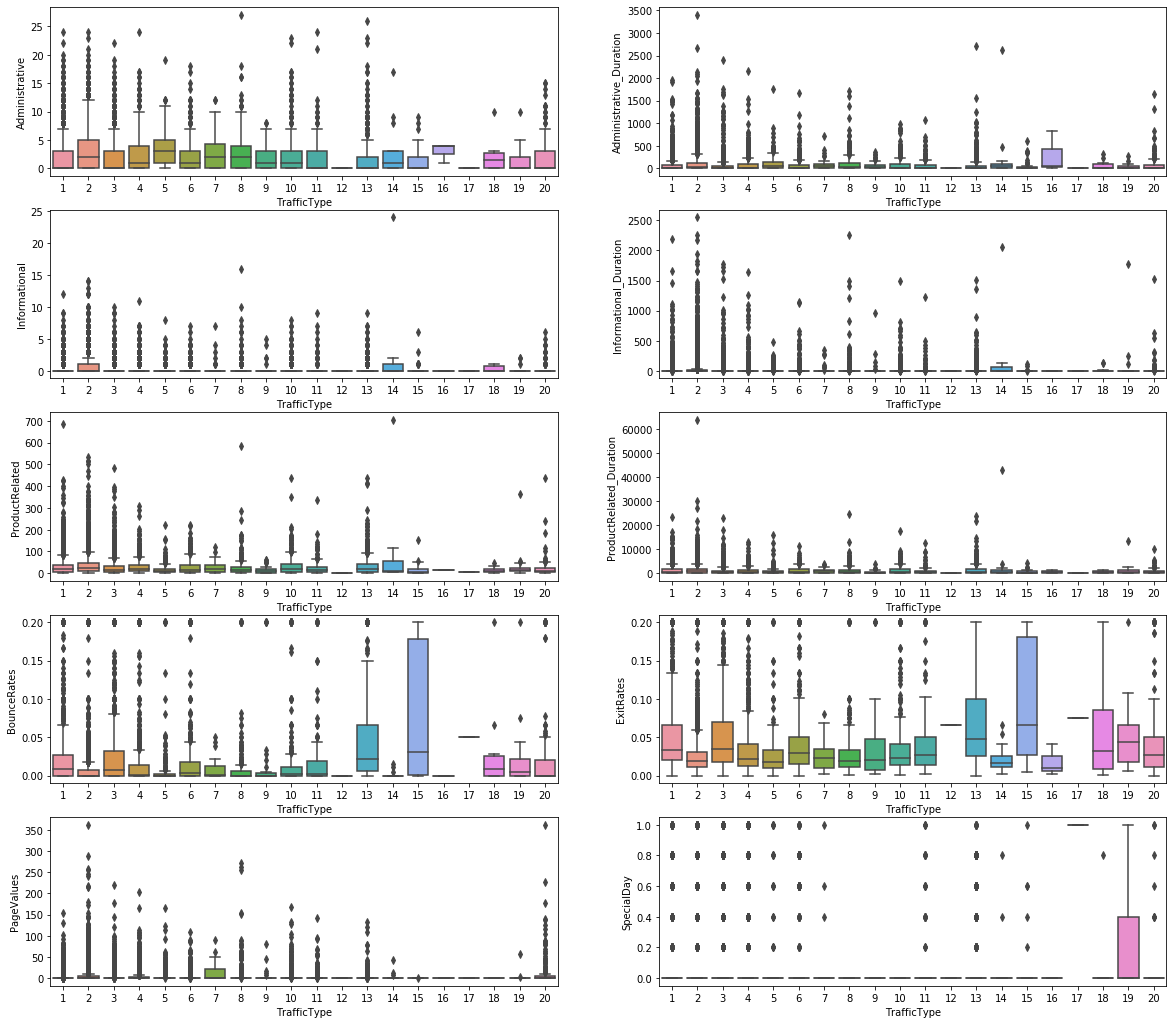

In [14]:
# traffic type vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='TrafficType',y=var,data=data)

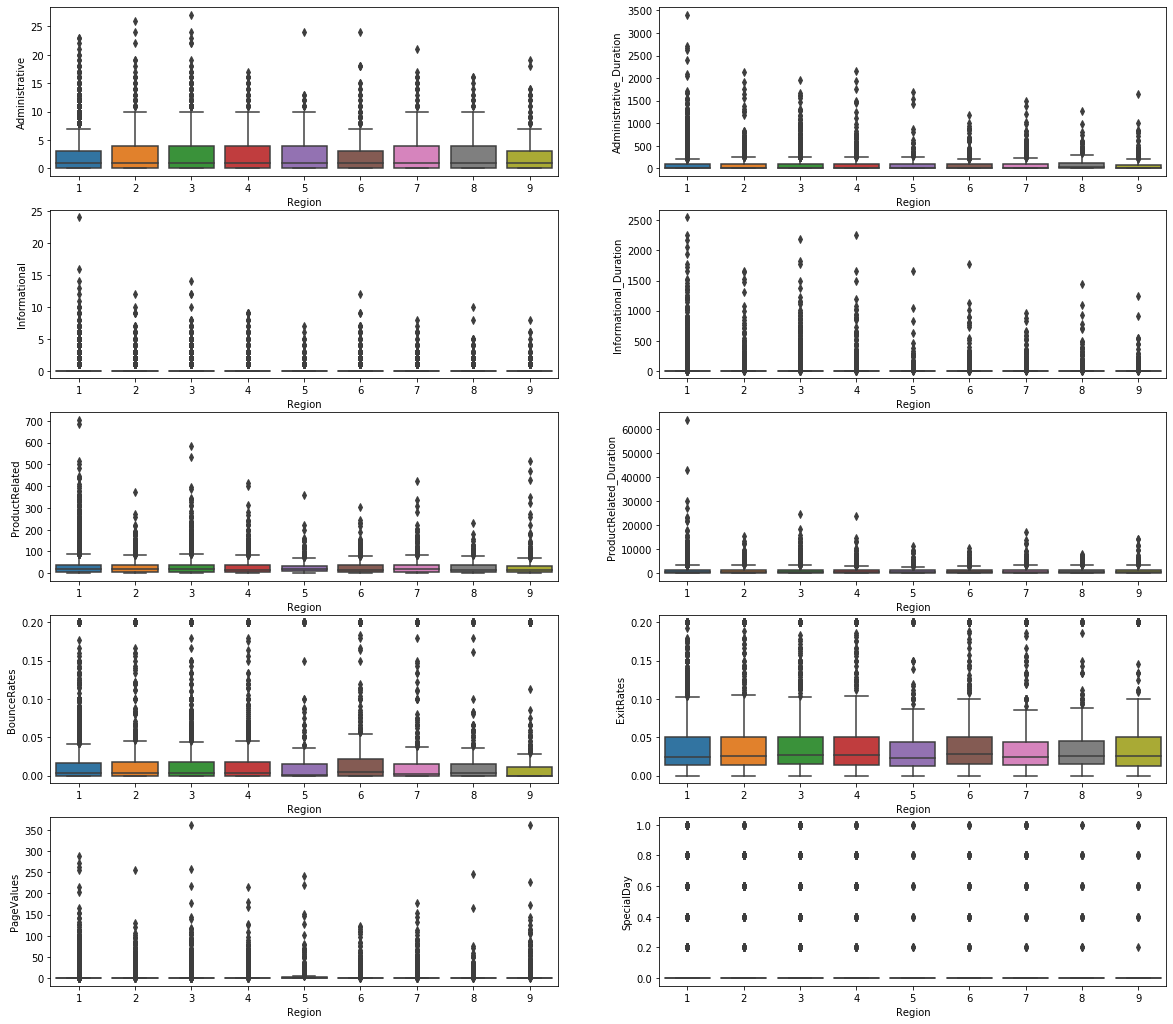

In [15]:
# region vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='Region',y=var,data=data)

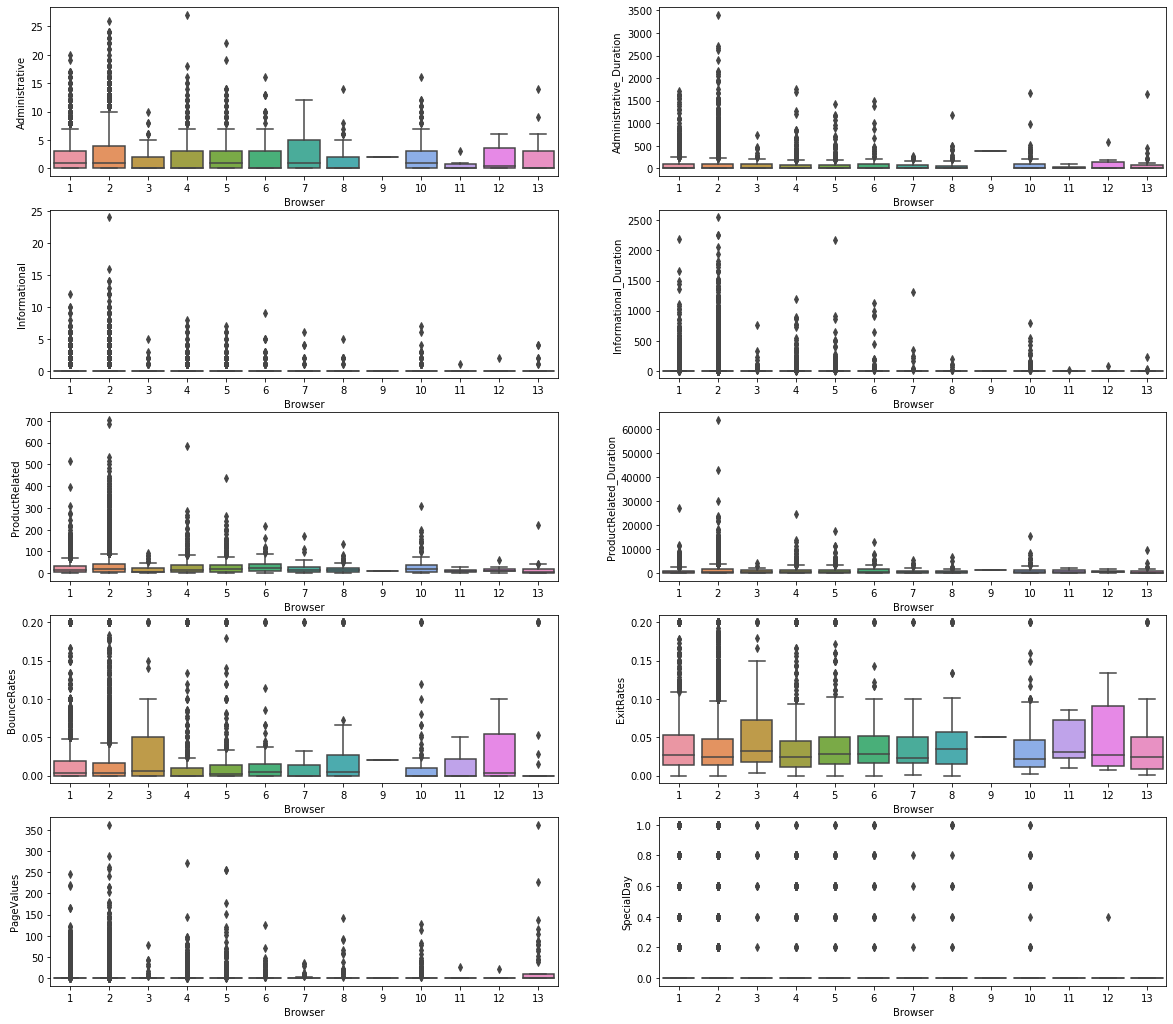

In [16]:
# browser vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='Browser',y=var,data=data)

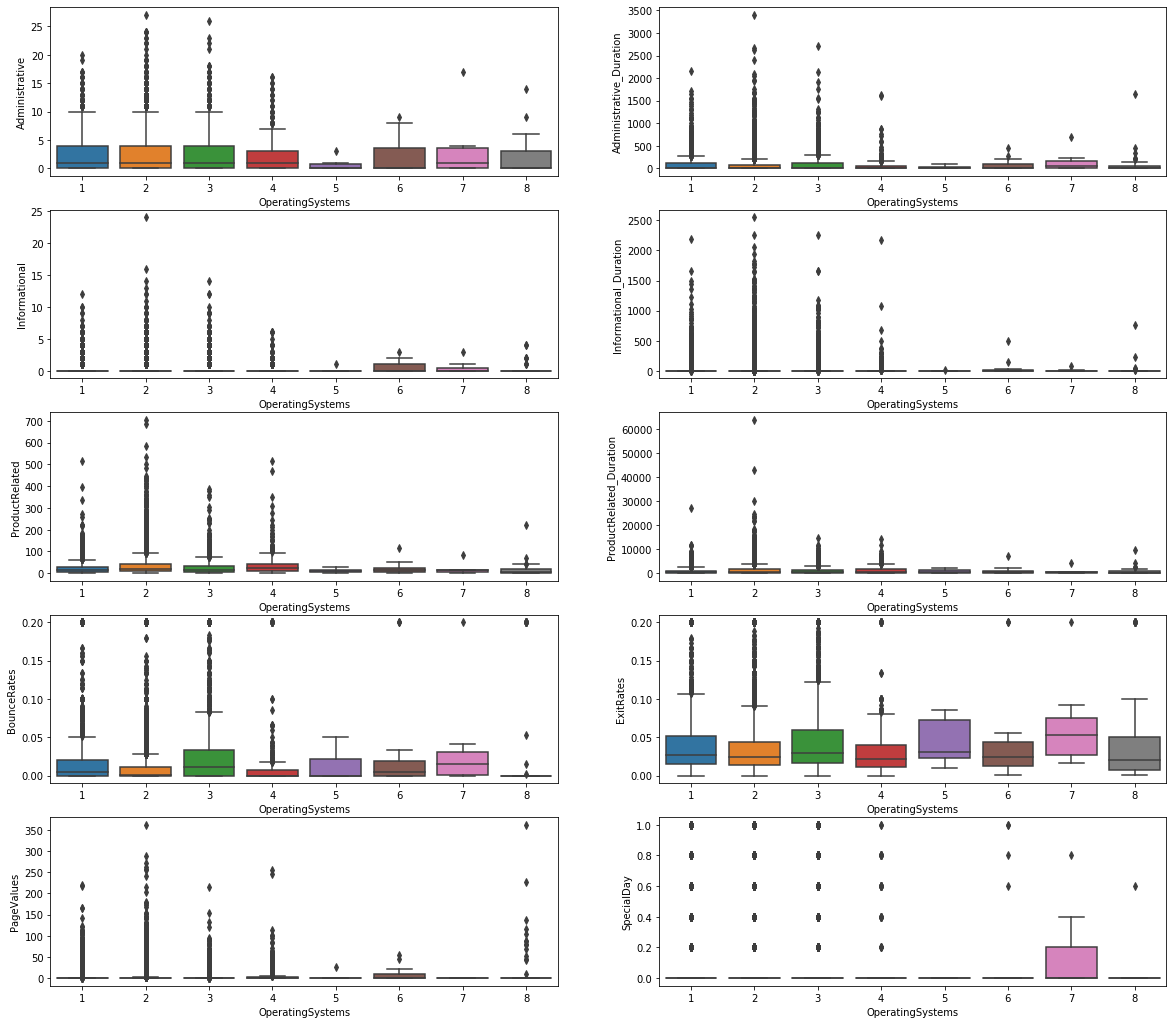

In [17]:
# operating systems vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='OperatingSystems',y=var,data=data)

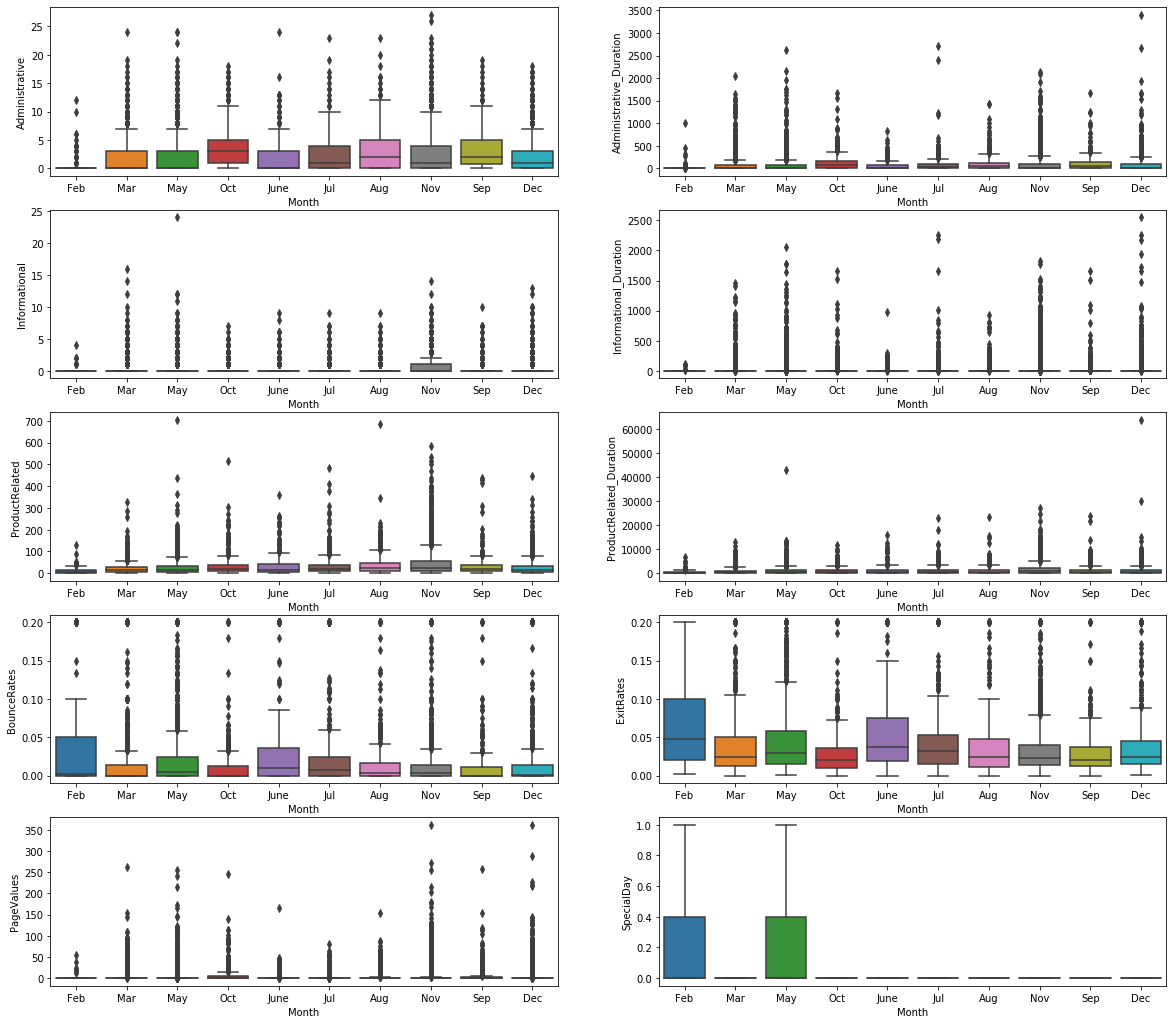

In [18]:
# month vs. continuous variables
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.boxplot(x='Month',y=var,data=data)

## 2. Data Preprocessing

### One Hot Coding

In [19]:
d = data

# get dummies
Month = pd.get_dummies(d['Month'],prefix='Month')
OperatingSystems = pd.get_dummies(d['OperatingSystems'],prefix='OperatingSystems')
Browser = pd.get_dummies(d['Browser'],prefix='Browser')
TrafficType = pd.get_dummies(d['TrafficType'],prefix='TrafficType')
VisitorType = pd.get_dummies(d['VisitorType'],prefix='VisitorType')
Region = pd.get_dummies(d['Region'],prefix='Region')

# combine dummies
d = pd.concat([d,Month,OperatingSystems,Browser,TrafficType,VisitorType,Region],1)
d.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'TrafficType_1',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType

In [20]:
# drop reference level and original categorical variables
del d['Month']
del d['OperatingSystems']
del d['Browser']
del d['TrafficType']
del d['VisitorType']
del d['Month_Feb']
del d['OperatingSystems_1']
del d['Browser_1']
del d['TrafficType_1']
del d['VisitorType_Other']
del d['Region']
del d['Region_1']

d.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
       'TrafficType_15', 'TrafficType_16

In [21]:
# bool to numeric
bool_map={False:0,True:1}
d['Revenue']=data['Revenue'].map(bool_map)
d['Weekend']=data['Weekend'].map(bool_map)

In [22]:
# log transform for skewed continuous
import numpy as np

d_lg = d.copy()
numerical_lg = list(numerical)[:-1]
for var in numerical_lg:
    d_lg[var] = np.log(d_lg[var]+0.0001)

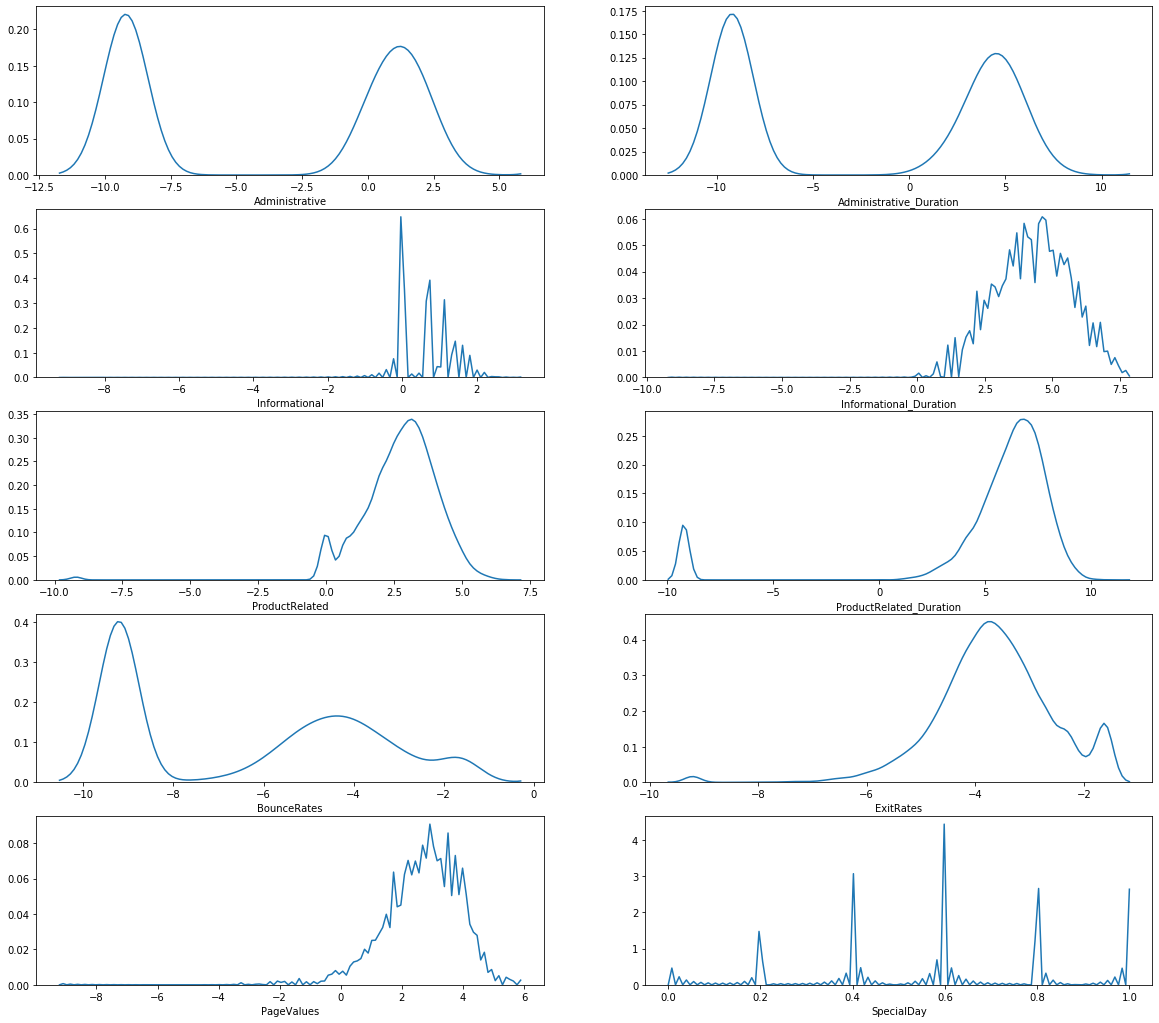

In [23]:
plt.figure(figsize=(20,18))
for idx, var in enumerate(numerical):
    plt.subplot(5,2,idx+1)
    sns.distplot(d_lg[var],hist=False)

### Train Test Split

70% as training set and 30% as testing set.

In [24]:
from sklearn.model_selection import train_test_split

y = d['Revenue']
X = d.drop(['Revenue'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


X_lg = d_lg.drop(['Revenue'], axis = 1)
X_lg_train, X_lg_test, y_train, y_test = train_test_split(X_lg,y,test_size=0.3,random_state=0)

In [25]:
# standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_lg_train = scaler.fit_transform(X_lg_train)
X_lg_test = scaler.transform(X_lg_test)

## 3. Logistic Regression

Accuracy: 0.869153825358205
Sensitivity: 0.5889175257731959
Specificity: 0.7347266881028939
AUC: 0.8155271399565494


Text(0.5, 257.44, 'Predicted label')

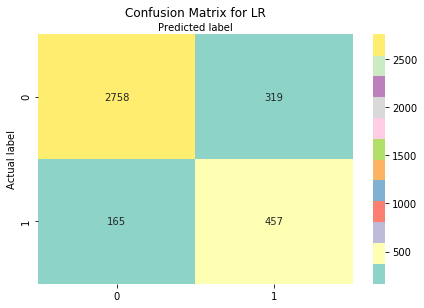

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# original data
# grid search
LR = GridSearchCV(LogisticRegression(),
                  {'penalty':['l1','l2'], # l1 lasso l2 ridge
                   'C':np.logspace(-4,4,20)},
                  cv=10) # 10-folds cross validation
LR.fit(X_train,y_train)
# best model
LR_best = LogisticRegression(**LR.best_params_).fit(X_train,y_train)
y_pred_LR = LR_best.predict(X_lg_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_LR))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_LR))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_LR))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_LR))

# confusion matrix
cm_LR = confusion_matrix(y_test,y_pred_LR)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_LR), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.8878075155447418
Sensitivity: 0.6949152542372882
Specificity: 0.5932475884244373
AUC: 0.7702994523207659


Text(0.5, 257.44, 'Predicted label')

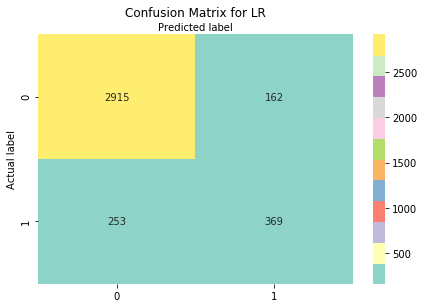

In [30]:
# on log-transformed data
# grid search
LR_lg = GridSearchCV(LogisticRegression(),
                  {'penalty':['l1','l2'], # l1 lasso l2 ridge
                   'C':np.logspace(-4,4,20)},
                  cv=10) # 10-folds cross validation
LR_lg.fit(X_lg_train,y_train)
# best model
LR_lg_best = LogisticRegression(**LR_lg.best_params_).fit(X_lg_train,y_train)
y_pred_LR_lg = LR_lg_best.predict(X_lg_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_LR_lg))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_LR_lg))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_LR_lg))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_LR_lg))

# confusion matrix
cm_LR_lg = confusion_matrix(y_test,y_pred_LR_lg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_LR_lg), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 4. SVM

Accuracy: 0.8759124087591241
Sensitivity: 0.7654723127035831
Specificity: 0.3778135048231511
AUC: 0.6772070449042632


Text(0.5, 257.44, 'Predicted label')

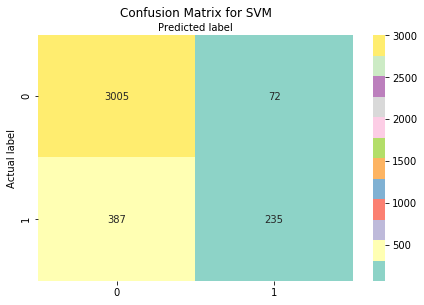

In [31]:
from sklearn import linear_model,svm
from sklearn.svm import SVC 

# original data
# grid search
SVM = GridSearchCV(svm.SVC(),
                  {'gamma':[0.001, 0.01, 0.1, 1],
                   'C':[1,10]},
                  cv=10) # 10-folds cross validation
SVM.fit(X_train,y_train)
# best model
SVM_best = svm.SVC(**SVM.best_params_).fit(X_train,y_train)
y_pred_SVM = SVM_best.predict(X_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_SVM))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_SVM))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_SVM))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_SVM))

# confusion matrix
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_SVM), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.8894295755609625
Sensitivity: 0.6878306878306878
Specificity: 0.6270096463022508
AUC: 0.7847430421956493


Text(0.5, 257.44, 'Predicted label')

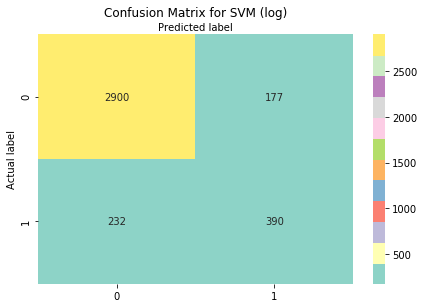

In [32]:
# on log-transformed data
# grid search
SVM_lg = GridSearchCV(svm.SVC(),
                  {'gamma':[0.001, 0.01, 0.1, 1],
                   'C':[1,10]},
                  cv=10) # 10-folds cross validation
SVM_lg.fit(X_train,y_train)
# best model
SVM_lg_best = svm.SVC(**SVM_lg.best_params_).fit(X_lg_train,y_train)
y_pred_SVM_lg = SVM_lg_best.predict(X_lg_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_SVM_lg))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_SVM_lg))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_SVM_lg))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_SVM_lg))

# confusion matrix
cm_SVM_lg = confusion_matrix(y_test,y_pred_SVM_lg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_SVM_lg), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for SVM (log)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 5. Random Forest

Accuracy: 0.8940254122735874
Sensitivity: 0.7738095238095238
Specificity: 0.522508038585209
AUC: 0.7458169052204563


Text(0.5, 257.44, 'Predicted label')

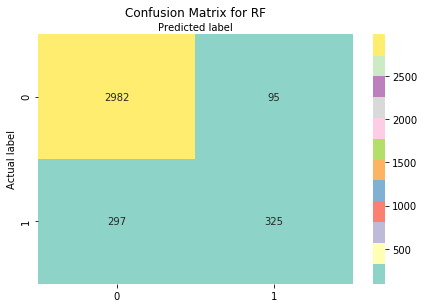

In [34]:
from sklearn.ensemble import RandomForestClassifier

# original data
# grid search
RF = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'),
                  {'n_estimators':range(1,211,10)},
                  cv=10) # 10-folds cross validation
RF.fit(X_train,y_train)
# best model
RF_best = RandomForestClassifier(**RF.best_params_).fit(X_train,y_train)
y_pred_RF = RF_best.predict(X_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_RF))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_RF))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_RF))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_RF))

# confusion matrix
cm_RF = confusion_matrix(y_test,y_pred_RF)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_RF), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.8972695323060287
Sensitivity: 0.7867298578199052
Specificity: 0.5337620578778135
AUC: 0.7522563945547663


Text(0.5, 257.44, 'Predicted label')

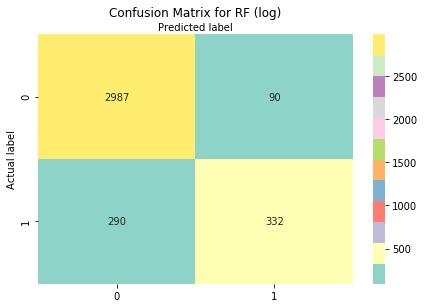

In [39]:
# on log-transformed data
# grid search
RF_lg = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'),
                  {'n_estimators':range(1,211,10)},
                  cv=10) # 10-folds cross validation
RF_lg.fit(X_lg_train,y_train)
# best model
RF_lg_best = RandomForestClassifier(**RF_lg.best_params_).fit(X_lg_train,y_train)
y_pred_RF_lg = RF_lg_best.predict(X_lg_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_RF_lg))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_RF_lg))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_RF_lg))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_RF_lg))

# confusion matrix
cm_RF_lg = confusion_matrix(y_test,y_pred_RF_lg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_RF_lg), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for RF (log)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 6. Naive Bayes

We don't use cross-validation to tune NB because there is no hyperparameters in NB to tune.

Accuracy: 0.2460124357934577
Sensitivity: 0.18122977346278318
Specificity: 0.9903536977491961
AUC: 0.5429506545294567


Text(0.5, 257.44, 'Predicted label')

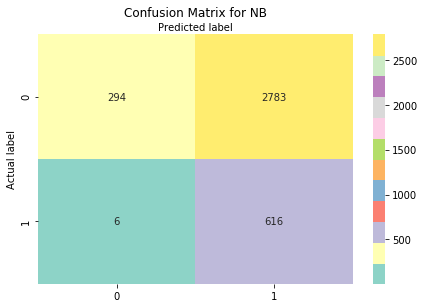

In [44]:
from sklearn.naive_bayes import GaussianNB

# original data
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = NB.predict(X_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_NB))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_NB))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_NB))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_NB))

# confusion matrix
cm_NB = confusion_matrix(y_test,y_pred_NB)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_NB), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for NB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.18545552852122196
Sensitivity: 0.17020689655172414
Specificity: 0.9919614147909968
AUC: 0.507192927090006


Text(0.5, 257.44, 'Predicted label')

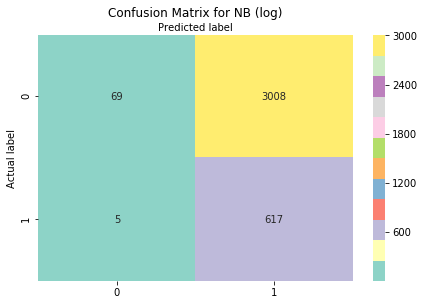

In [43]:
# on log-transformed data
NB_lg =GaussianNB().fit(X_lg_train,y_train)
y_pred_NB_lg = NB_lg.predict(X_lg_test)

# accuracy
print('Accuracy:',accuracy_score(y_test,y_pred_NB_lg))
# precision (sensitivity)
print('Sensitivity:',precision_score(y_test,y_pred_NB_lg))
# recall (specificity)
print('Specificity:',recall_score(y_test,y_pred_NB_lg))
# auc
print('AUC:',roc_auc_score(y_test,y_pred_NB_lg))

# confusion matrix
cm_NB_lg = confusion_matrix(y_test,y_pred_NB_lg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_NB_lg), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for NB (log)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

NB is not good. Things are even worse on log data!